# 3D Visualization: Surface Plots, Wireframes, and Triangulations

This tutorial covers advanced 3D visualization techniques using matplotlib, including:
- Surface plots and contour plots
- Wireframe visualizations
- Triangulation and mesh generation
- Custom 3D plotting techniques

## Learning Objectives
By the end of this tutorial, you will be able to:
1. Create and customize 3D surface plots
2. Generate wireframe visualizations
3. Work with triangulated surfaces
4. Apply colormaps and lighting effects
5. Create interactive 3D plots

## 1. Setup and Imports

First, let's import the necessary libraries and set up our environment.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.spatial import Delaunay
import matplotlib.tri as tri

# Set up the plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Enable interactive plots (if using Jupyter)
%matplotlib inline

## 2. Basic 3D Surface Plots

### 2.1 Creating a Simple Surface Plot
Learn how to create basic 3D surface plots using `plot_surface()`.

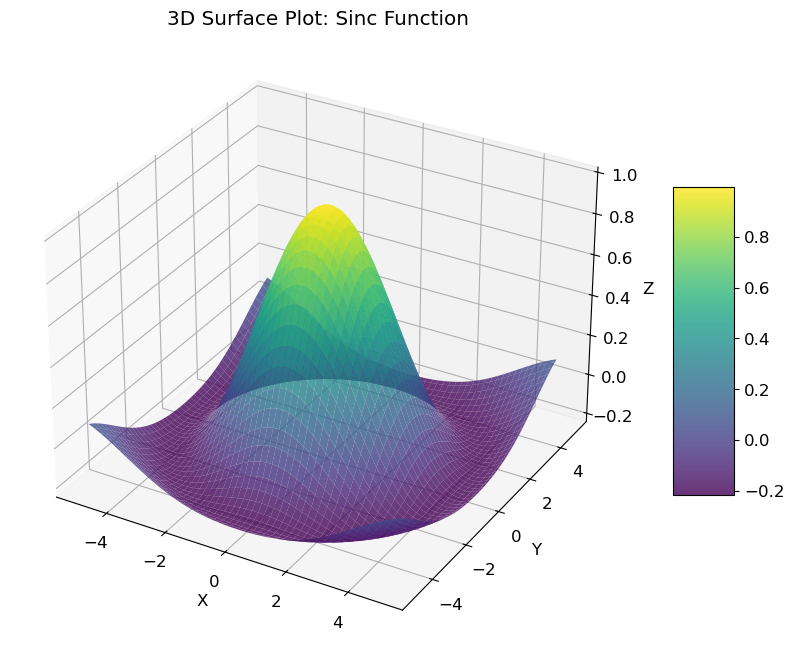

In [37]:
# Generate sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Create a mathematical function (e.g., sinc function)
Z = np.sin(np.sqrt(X**2 + Y**2)) / (np.sqrt(X**2 + Y**2) + 1e-8)

# Create 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot: Sinc Function')

# Add colorbar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()

### 2.2 Surface Plot with Custom Parameters
Explore different parameters for surface plots including shading, lighting, and colormaps.

## 3. Wireframe Visualizations

### 3.1 Basic Wireframe Plot
Learn how to create wireframe plots using `plot_wireframe()`.

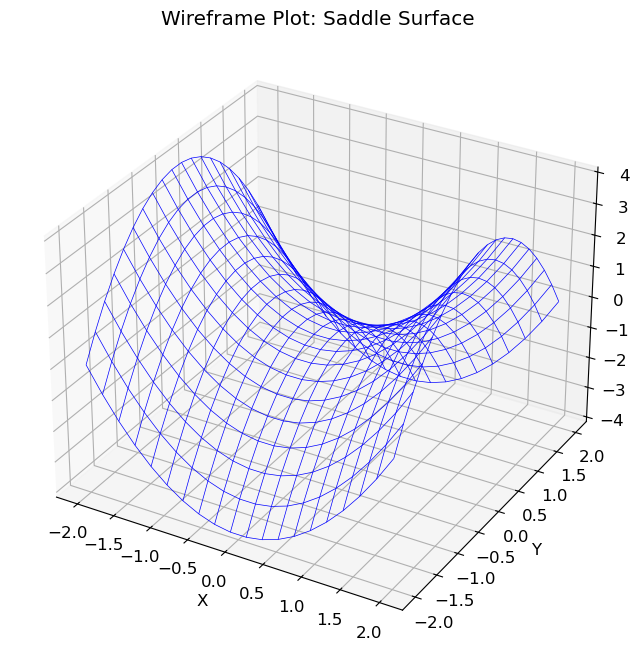

In [42]:
# Generate data for wireframe
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Create a saddle surface
Z = X**2 - Y**2

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

wireframe = ax.plot_wireframe(X, Y, Z, color='blue', linewidth=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Wireframe Plot: Saddle Surface')
plt.show()

### 3.2 Combined Surface and Wireframe
Combine surface and wireframe plots for enhanced visualization.

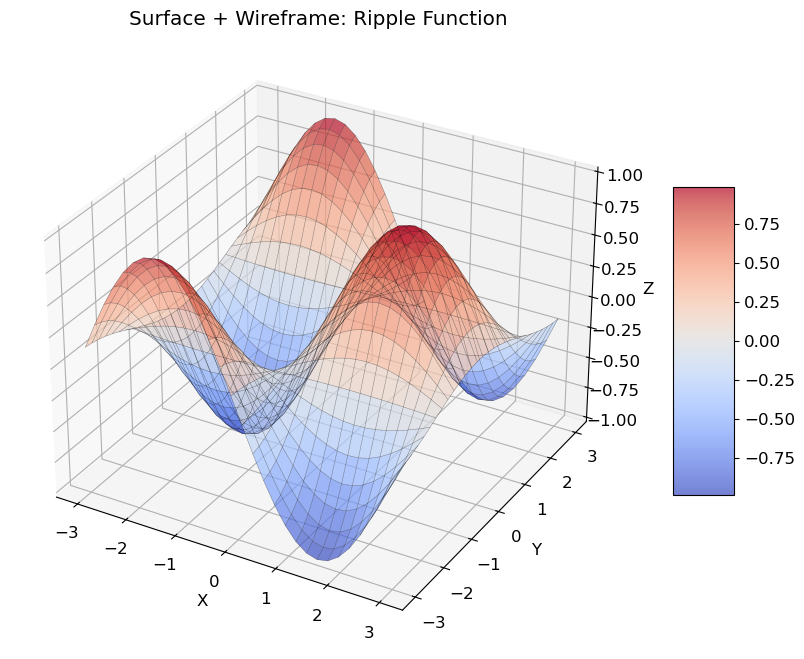

In [45]:
# Create a more complex surface
x = np.linspace(-3, 3, 30)
y = np.linspace(-3, 3, 30)
X, Y = np.meshgrid(x, y)

# Ripple function
Z = np.sin(X) * np.cos(Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Add surface plot
surface = ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7)

# Add wireframe overlay
wireframe = ax.plot_wireframe(X, Y, Z, color='black', linewidth=0.3, alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface + Wireframe: Ripple Function')

fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()

## 4. Triangulation and Mesh Generation

### 4.1 Basic Triangulation
Learn how to create triangulated surfaces from scattered data points.

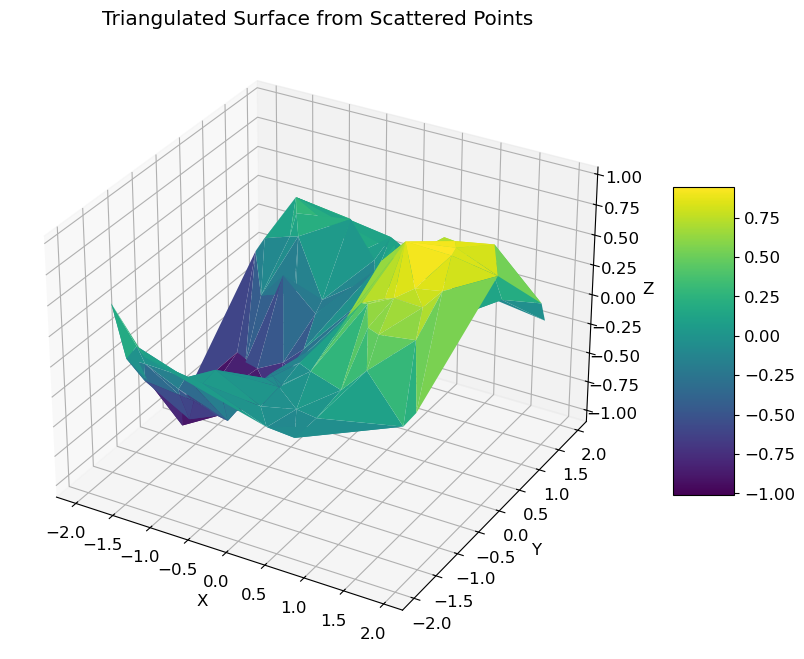

In [47]:
# Generate random scattered points
np.random.seed(42)
n_points = 100
x = np.random.uniform(-2, 2, n_points)
y = np.random.uniform(-2, 2, n_points)
z = np.sin(x) * np.cos(y) + 0.1 * np.random.normal(0, 1, n_points)

# Create triangulation
triang = tri.Triangulation(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot triangulated surface
tri_surface = ax.plot_trisurf(x, y, z, triangles=triang.triangles, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Triangulated Surface from Scattered Points')

fig.colorbar(tri_surface, ax=ax, shrink=0.5, aspect=5)
plt.show()

### 4.2 Advanced Triangulation with Delaunay
Use scipy's Delaunay triangulation for more control over mesh generation.

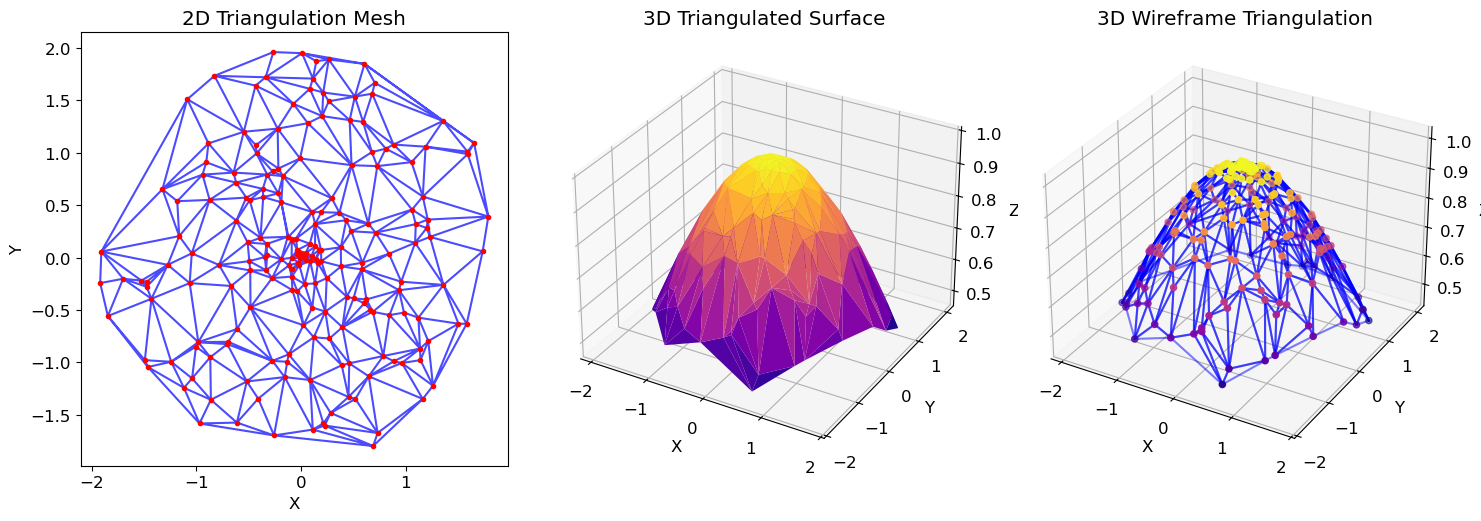

In [50]:
# Generate points in a more structured way
np.random.seed(42)
n_points = 200

# Create points with some structure
theta = np.random.uniform(0, 2*np.pi, n_points)
r = np.random.uniform(0, 2, n_points)
x = r * np.cos(theta)
y = r * np.sin(theta)

# Create height function
z = np.sin(np.sqrt(x**2 + y**2)) / (np.sqrt(x**2 + y**2) + 1e-8)

# Perform Delaunay triangulation
points = np.column_stack((x, y))
triangulation = Delaunay(points)

fig = plt.figure(figsize=(15, 5))

# Plot 1: Triangulation mesh
ax1 = fig.add_subplot(131)
ax1.triplot(x, y, triangulation.simplices, 'b-', alpha=0.7)
ax1.plot(x, y, 'ro', markersize=3)
ax1.set_title('2D Triangulation Mesh')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect('equal')

# Plot 2: 3D triangulated surface
ax2 = fig.add_subplot(132, projection='3d')
tri_surface = ax2.plot_trisurf(x, y, z, triangles=triangulation.simplices, cmap='plasma')
ax2.set_title('3D Triangulated Surface')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Plot 3: Wireframe of triangulation
ax3 = fig.add_subplot(133, projection='3d')
for simplex in triangulation.simplices:
    vertices = points[simplex]
    z_vertices = z[simplex]
    ax3.plot([vertices[0, 0], vertices[1, 0]], 
             [vertices[0, 1], vertices[1, 1]], 
             [z_vertices[0], z_vertices[1]], 'b-', alpha=0.5)
    ax3.plot([vertices[1, 0], vertices[2, 0]], 
             [vertices[1, 1], vertices[2, 1]], 
             [z_vertices[1], z_vertices[2]], 'b-', alpha=0.5)
    ax3.plot([vertices[2, 0], vertices[0, 0]], 
             [vertices[2, 1], vertices[0, 1]], 
             [z_vertices[2], z_vertices[0]], 'b-', alpha=0.5)

ax3.scatter(x, y, z, c=z, cmap='plasma', s=20)
ax3.set_title('3D Wireframe Triangulation')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

plt.tight_layout()
plt.show()

## 5. Advanced 3D Visualization Techniques

### 5.1 Multiple Surfaces and Transparency
Create complex visualizations with multiple surfaces and transparency effects.

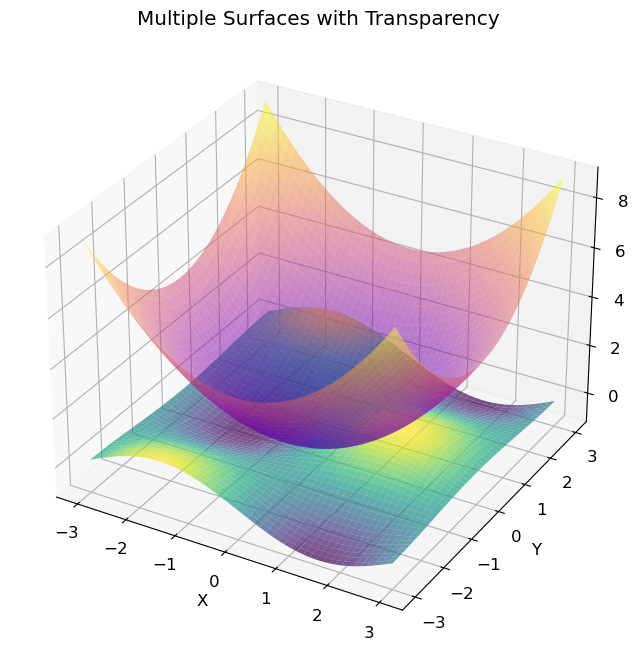

In [52]:
# Create multiple surfaces
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)

# Two different surfaces
Z1 = np.sin(X) * np.cos(Y)  # Ripple surface
Z2 = 0.5 * (X**2 + Y**2)    # Parabolic surface

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot first surface
surface1 = ax.plot_surface(X, Y, Z1, cmap='viridis', alpha=0.7, label='Surface 1')

# Plot second surface
surface2 = ax.plot_surface(X, Y, Z2, cmap='plasma', alpha=0.5, label='Surface 2')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Multiple Surfaces with Transparency')

plt.show()

### 5.2 Contour Plots on 3D Surfaces
Add contour plots to enhance 3D surface visualizations.

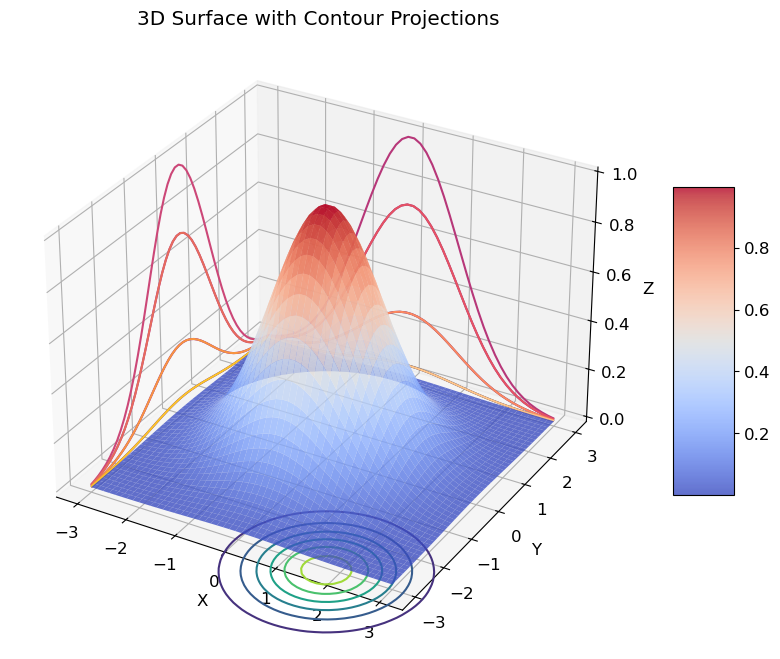

In [55]:
# Create surface with contours
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)

# Gaussian function
Z = np.exp(-(X**2 + Y**2) / 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surface = ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)

# Add contour plots
contour = ax.contour(X, Y, Z, zdir='z', offset=-0.5, cmap='viridis')
contour_x = ax.contour(X, Y, Z, zdir='x', offset=-3, cmap='plasma')
contour_y = ax.contour(X, Y, Z, zdir='y', offset=3, cmap='magma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface with Contour Projections')

fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()

## 6. Interactive 3D Visualization

### 6.1 Creating Interactive Plots
Learn how to create interactive 3D plots that can be rotated and zoomed.

In [57]:
# Enable interactive backend
%matplotlib notebook

# Create an interactive 3D plot
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)

# Create a complex surface
Z = np.sin(X) * np.cos(Y) + 0.1 * np.sin(5*X) * np.cos(5*Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(X, Y, Z, cmap='rainbow', alpha=0.8)
wireframe = ax.plot_wireframe(X, Y, Z, color='black', linewidth=0.3, alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Interactive 3D Surface Plot\n(Rotate, zoom, and pan)')

fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()

<IPython.core.display.Javascript object>

In [58]:

# Switch back to inline for static plots
%matplotlib inline

## 7. Practical Applications

### 7.1 Terrain Visualization
Create a realistic terrain visualization using 3D surface plots.

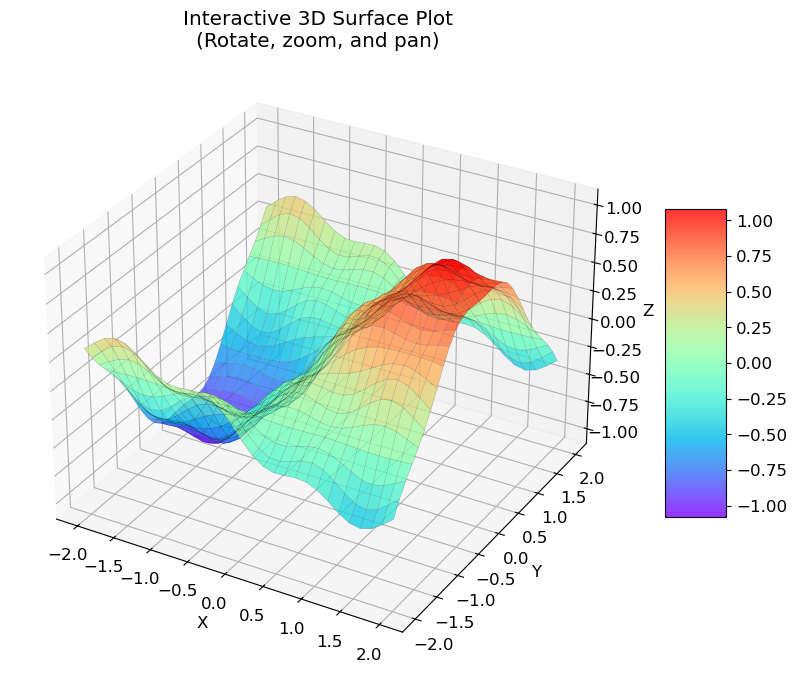

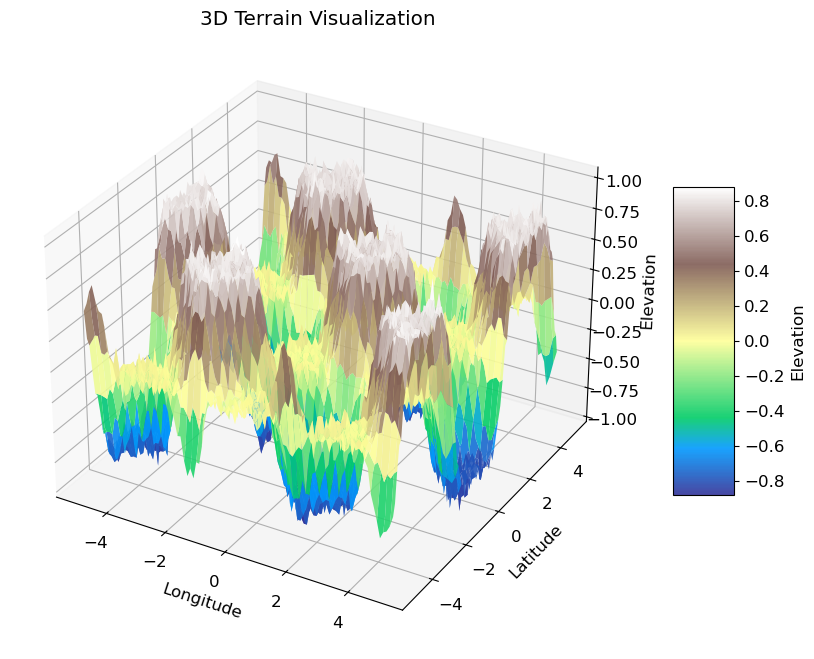

In [60]:
# Generate terrain-like data
np.random.seed(42)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Create terrain with multiple frequency components
Z = (np.sin(X) * np.cos(Y) + 
     0.3 * np.sin(3*X) * np.cos(3*Y) + 
     0.1 * np.sin(5*X) * np.cos(5*Y) +
     0.05 * np.random.normal(0, 1, X.shape))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(X, Y, Z, cmap='terrain', alpha=0.9)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation')
ax.set_title('3D Terrain Visualization')

fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5, label='Elevation')
plt.show()

### 7.2 Mathematical Function Visualization
Visualize complex mathematical functions in 3D.

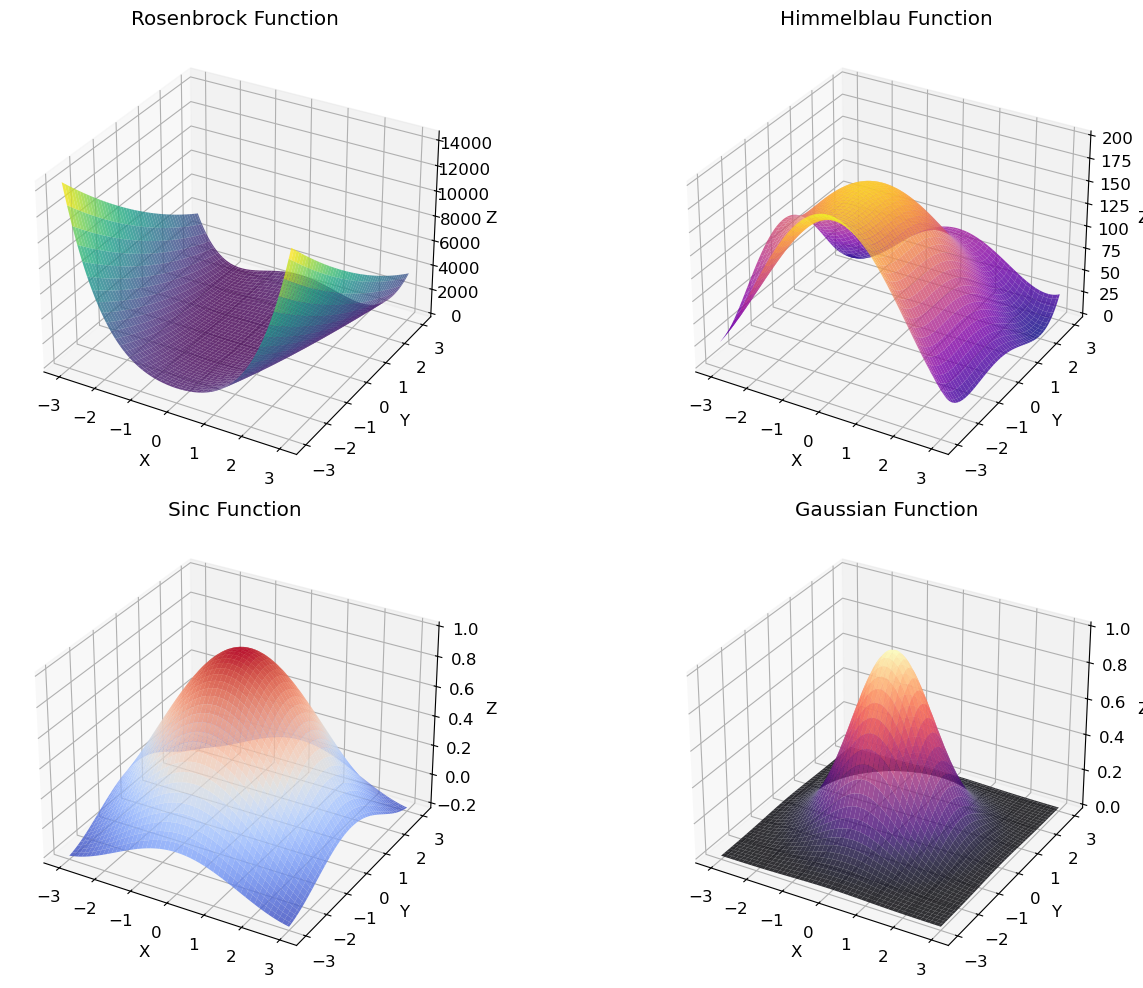

In [63]:
# Create visualization of complex mathematical functions
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(15, 10))

# Function 1: Rosenbrock function
Z1 = (1 - X)**2 + 100 * (Y - X**2)**2
ax1 = fig.add_subplot(221, projection='3d')
surface1 = ax1.plot_surface(X, Y, Z1, cmap='viridis', alpha=0.8)
ax1.set_title('Rosenbrock Function')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Function 2: Himmelblau function
Z2 = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2
ax2 = fig.add_subplot(222, projection='3d')
surface2 = ax2.plot_surface(X, Y, Z2, cmap='plasma', alpha=0.8)
ax2.set_title('Himmelblau Function')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Function 3: Trigonometric function
Z3 = np.sin(np.sqrt(X**2 + Y**2)) / (np.sqrt(X**2 + Y**2) + 1e-8)
ax3 = fig.add_subplot(223, projection='3d')
surface3 = ax3.plot_surface(X, Y, Z3, cmap='coolwarm', alpha=0.8)
ax3.set_title('Sinc Function')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# Function 4: Exponential function
Z4 = np.exp(-(X**2 + Y**2) / 2)
ax4 = fig.add_subplot(224, projection='3d')
surface4 = ax4.plot_surface(X, Y, Z4, cmap='magma', alpha=0.8)
ax4.set_title('Gaussian Function')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

plt.tight_layout()
plt.show()

## 8. Best Practices and Tips

### 8.1 Performance Optimization
- Use appropriate grid sizes for your data
- Consider using `rstride` and `cstride` parameters for large datasets
- Use `alpha` parameter for transparency when overlaying multiple surfaces

### 8.2 Visualization Guidelines
- Choose appropriate colormaps for your data
- Use meaningful axis labels and titles
- Consider the viewing angle for optimal interpretation
- Add colorbars when using colormaps

### 8.3 Common Pitfalls to Avoid
- Avoid over-plotting with too many elements
- Be careful with transparency settings
- Ensure proper data normalization for colormaps
- Consider the aspect ratio of your plots

## 9. Exercises

### Exercise 1: Create a Custom 3D Surface
Create a 3D surface plot of the function: $f(x,y) = \sin(x) \cdot \cos(y) + 0.5 \cdot \sin(2x) \cdot \cos(2y)$

### Exercise 2: Wireframe with Custom Colors
Create a wireframe plot where the color of each line segment depends on the height (z-value).

### Exercise 3: Triangulation from Real Data
Load a dataset with x, y, z coordinates and create a triangulated surface plot.

### Exercise 4: Interactive Multi-Surface Plot
Create an interactive plot with two surfaces that can be toggled on/off.

### Exercise 5: Contour-Surface Combination
Create a visualization that combines surface plots with contour projections on all three planes.